In [1]:
import pandas as pd
import sys
import datetime
import matplotlib.pylab as plt
import numpy as np
from math import log

In [2]:
START_DATE = datetime.date(2020,2,24)

In [3]:
def calculate_and_create_chart_for_province(start_date: datetime.date, province: str):
    day = start_date
    cases = {}
    while day<=datetime.date.today():
        day_str = day.strftime("%Y%m%d")
        filename = '../dati-province/dpc-covid19-ita-province-' + day_str + '.csv'
        df = pd.read_csv(filename, encoding = "ISO-8859-1")
        cases[day_str] = int(df[df["denominazione_provincia"]==province]["totale_casi"])
        day = day + datetime.timedelta(days = 1)

    cases_df = pd.DataFrame.from_dict(cases, orient='index')
    cases_df = cases_df.reset_index()
    cases_df = cases_df.rename(columns={"index": "Day", 0: "Cases"})
    
    cases_df_today = cases_df[cases_df["Day"]==datetime.date.today().strftime("%Y%m%d")]["Cases"].sum()
    print("Total cases per 1000 inhabitants up to today:", round(calculate_cases_to_inhabitants_ratio(cases_df_today, province),4))
    calculate_stats(cases_df)

    x = cases_df.index
    y = cases_df["Cases"]
    plt.scatter(x, y)

    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.grid()

    plt.show()
    return

In [4]:
def calculate_and_create_chart_for_region(start_date: datetime.date, region: str):
    day = start_date
    cases = {}
    while day<=datetime.date.today():
        day_str = day.strftime("%Y%m%d")
        filename = '../dati-province/dpc-covid19-ita-province-' + day_str + '.csv'
        df = pd.read_csv(filename, encoding = "ISO-8859-1")
        cases[day_str] = int(df[(df["denominazione_regione"]==region)&(df["denominazione_provincia"]!='In fase di definizione/aggiornamento')]["totale_casi"].sum())
        day = day + datetime.timedelta(days = 1)

    cases_df = pd.DataFrame.from_dict(cases, orient='index')
    cases_df = cases_df.reset_index()
    cases_df = cases_df.rename(columns={"index": "Day", 0: "Cases"})
    
    calculate_stats(cases_df)

    x = cases_df.index
    y = cases_df["Cases"]
    plt.scatter(x, y)

    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.grid()
    plt.yscale("log")
    plt.show()
    return

In [5]:
def calculate_and_create_chart_for_Italy(start_date: datetime.date):
    day = start_date
    cases = {}
    while day<=datetime.date.today():
        day_str = day.strftime("%Y%m%d")
        filename = '../dati-province/dpc-covid19-ita-province-' + day_str + '.csv'
        df = pd.read_csv(filename, encoding = "ISO-8859-1")
        cases[day_str] = int(df[df["denominazione_provincia"]!='In fase di definizione/aggiornamento']["totale_casi"].sum())
        day = day + datetime.timedelta(days = 1)

    cases_df = pd.DataFrame.from_dict(cases, orient='index')
    cases_df = cases_df.reset_index()
    cases_df = cases_df.rename(columns={"index": "Day", 0: "Cases"})
    
    calculate_stats(cases_df)

    x = cases_df.index
    y = cases_df["Cases"]
    plt.scatter(x, y)

    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.grid()

    plt.show()
    return

In [6]:
def calculate_stats(cases_df):
    cases_df_today = cases_df[cases_df["Day"]==datetime.date.today().strftime("%Y%m%d")]["Cases"].sum()
    cases_df_yesterday = cases_df[cases_df["Day"]==(datetime.date.today()- datetime.timedelta(days = 1)).strftime("%Y%m%d")]["Cases"].sum()
    cases_df_five_days_ago = cases_df[cases_df["Day"]==(datetime.date.today()- datetime.timedelta(days = 5)).strftime("%Y%m%d")]["Cases"].sum()
    cases_df_six_days_ago = cases_df[cases_df["Day"]==(datetime.date.today()- datetime.timedelta(days = 6)).strftime("%Y%m%d")]["Cases"].sum()
    print("Total cases up to today:", cases_df_today)
    print("New cases registered today:", cases_df_today-cases_df_yesterday)
    if int(cases_df_yesterday) != 0:
        print("New cases registered today in %:", round((cases_df_today-cases_df_yesterday)/cases_df_yesterday*100,2))

    print("Doubling time in the last five days:", round(calculate_doubling_time_in_the_last_five_days(cases_df_today, cases_df_five_days_ago), 1))
    print("Doubling time yesterday:", round(calculate_doubling_time_in_the_last_five_days(cases_df_yesterday, cases_df_six_days_ago), 1))
    print("Trend of new cases (in %) in the last 5 days:", round((cases_df_today-cases_df_five_days_ago)/cases_df_five_days_ago*100,2))
    
    return

In [7]:
def calculate_doubling_time_in_the_last_five_days(cases_df_today, cases_df_five_days_ago):
    if cases_df_five_days_ago ==0:
        return np.nan
    log_result = log(cases_df_today/cases_df_five_days_ago)
    if log_result != 0:
        return (5*log(2))/(log_result)
    else:
        return np.nan
    

In [8]:
def calculate_cases_to_inhabitants_ratio(cases: int, province: str) -> float:
    df_province: pd.DataFrame = pd.read_csv("../general/province.csv")
    inhabitants = df_province[df_province["Provincia"]==province]["Residenti"].str.replace('.', '', regex=True).sum()
    return int(cases)/int(inhabitants)*1000

# Casi di COVID-19 in Italia - COVID-19 cases in Italy

Total cases up to today: 98637
New cases registered today: 3956
New cases registered today in %: 4.18
Doubling time in the last five days: 11.1
Doubling time yesterday: 10.0
Trend of new cases (in %) in the last 5 days: 36.8


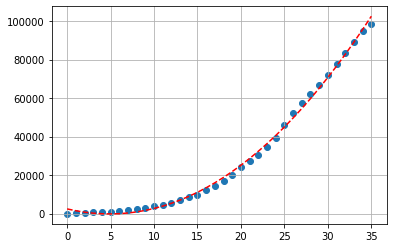

In [9]:
calculate_and_create_chart_for_Italy(START_DATE)

# Casi di COVID-19 in Abruzzo - COVID-19 cases in Abruzzo

Total cases up to today: 1345
New cases registered today: 52
New cases registered today in %: 4.02
Doubling time in the last five days: 6.9
Doubling time yesterday: 5.5
Trend of new cases (in %) in the last 5 days: 65.44


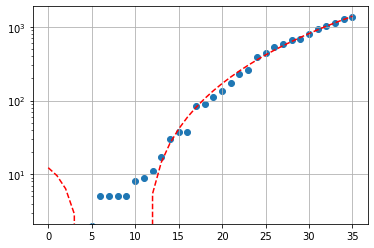

In [10]:
calculate_and_create_chart_for_region(START_DATE, 'Abruzzo')

## Chieti

Total cases per 1000 inhabitants up to today: 0.7015
Total cases up to today: 273
New cases registered today: 7
New cases registered today in %: 2.63
Doubling time in the last five days: 5.5
Doubling time yesterday: 5.0
Trend of new cases (in %) in the last 5 days: 86.99


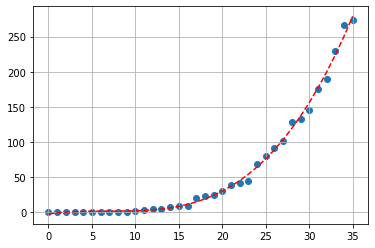

In [11]:
calculate_and_create_chart_for_province(START_DATE, 'Chieti')

## L'Aquila

Total cases per 1000 inhabitants up to today: 0.3809
Total cases up to today: 115
New cases registered today: 14
New cases registered today in %: 13.86
Doubling time in the last five days: 5.3
Doubling time yesterday: 4.5
Trend of new cases (in %) in the last 5 days: 91.67


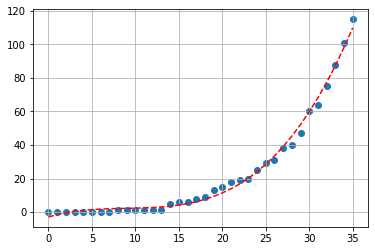

In [12]:
calculate_and_create_chart_for_province(START_DATE, "L'Aquila")

## Pescara

Total cases per 1000 inhabitants up to today: 1.8487
Total cases up to today: 594
New cases registered today: 18
New cases registered today in %: 3.12
Doubling time in the last five days: 9.5
Doubling time yesterday: 7.8
Trend of new cases (in %) in the last 5 days: 44.17


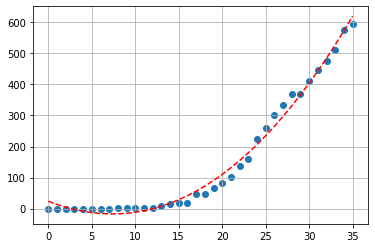

In [13]:
calculate_and_create_chart_for_province(START_DATE, 'Pescara')

## Teramo

Total cases per 1000 inhabitants up to today: 1.1715
Total cases up to today: 363
New cases registered today: 13
New cases registered today in %: 3.71
Doubling time in the last five days: 5.6
Doubling time yesterday: 3.8
Trend of new cases (in %) in the last 5 days: 86.15


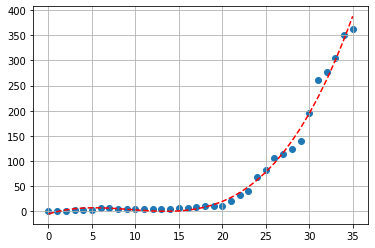

In [14]:
calculate_and_create_chart_for_province(START_DATE, 'Teramo')

# Casi di COVID-19 in Basilicata - COVID-19 cases in Basilicata

Total cases up to today: 214
New cases registered today: 12
New cases registered today in %: 5.94
Doubling time in the last five days: 4.9
Doubling time yesterday: 4.4
Trend of new cases (in %) in the last 5 days: 101.89


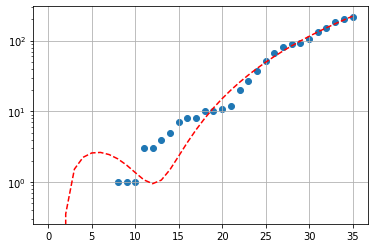

In [15]:
calculate_and_create_chart_for_region(START_DATE, 'Basilicata')

## Matera

Total cases per 1000 inhabitants up to today: 0.4607
Total cases up to today: 92
New cases registered today: 8
New cases registered today in %: 9.52
Doubling time in the last five days: 3.7
Doubling time yesterday: 2.9
Trend of new cases (in %) in the last 5 days: 155.56


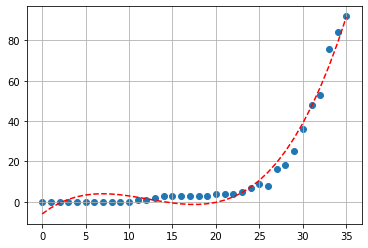

In [16]:
calculate_and_create_chart_for_province(START_DATE, 'Matera')

## Potenza

Total cases per 1000 inhabitants up to today: 0.3291
Total cases up to today: 122
New cases registered today: 4
New cases registered today in %: 3.39
Doubling time in the last five days: 6.2
Doubling time yesterday: 6.1
Trend of new cases (in %) in the last 5 days: 74.29


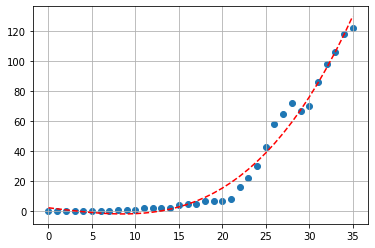

In [17]:
calculate_and_create_chart_for_province(START_DATE, 'Potenza')

# Casi di COVID-19 nella Provincia Autonoma di Bolzano - COVID-19 cases in Autonomous Province of Bolzano

Total cases up to today: 1325
New cases registered today: 111
New cases registered today in %: 9.14
Doubling time in the last five days: 8.0
Doubling time yesterday: 7.9
Trend of new cases (in %) in the last 5 days: 54.43


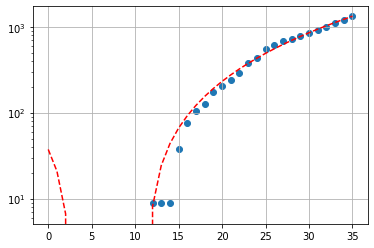

In [18]:
calculate_and_create_chart_for_region(START_DATE, 'P.A. Bolzano')

# Casi di COVID-19 in Calabria - COVID-19 cases in Calabria

Total cases up to today: 645
New cases registered today: 33
New cases registered today in %: 5.39
Doubling time in the last five days: 5.6
Doubling time yesterday: 5.3
Trend of new cases (in %) in the last 5 days: 84.81


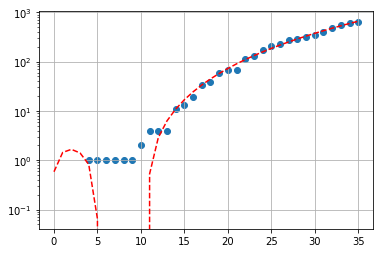

In [19]:
calculate_and_create_chart_for_region(START_DATE, 'Calabria')

## Catanzaro

Total cases per 1000 inhabitants up to today: 0.3698
Total cases up to today: 134
New cases registered today: 11
New cases registered today in %: 8.94
Doubling time in the last five days: 3.6
Doubling time yesterday: 3.8
Trend of new cases (in %) in the last 5 days: 162.75


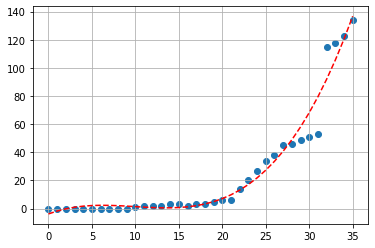

In [20]:
calculate_and_create_chart_for_province(START_DATE, 'Catanzaro')

## Cosenza

Total cases per 1000 inhabitants up to today: 0.2585
Total cases up to today: 184
New cases registered today: 13
New cases registered today in %: 7.6
Doubling time in the last five days: 5.6
Doubling time yesterday: 4.9
Trend of new cases (in %) in the last 5 days: 85.86


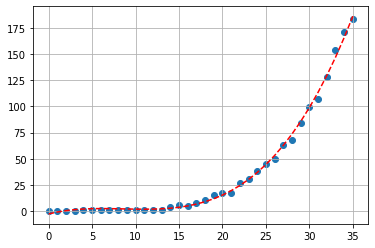

In [21]:
calculate_and_create_chart_for_province(START_DATE, 'Cosenza')

## Crotone

Total cases per 1000 inhabitants up to today: 0.5297
Total cases up to today: 93
New cases registered today: 3
New cases registered today in %: 3.33
Doubling time in the last five days: 12.8
Doubling time yesterday: 11.2
Trend of new cases (in %) in the last 5 days: 30.99


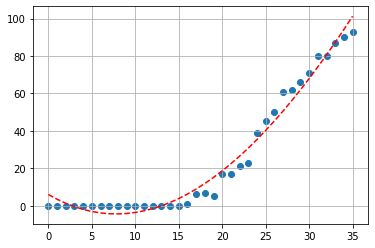

In [22]:
calculate_and_create_chart_for_province(START_DATE, 'Crotone')

## Reggio di Calabria

Total cases per 1000 inhabitants up to today: 0.343
Total cases up to today: 190
New cases registered today: 1
New cases registered today in %: 0.53
Doubling time in the last five days: 5.8
Doubling time yesterday: 5.2
Trend of new cases (in %) in the last 5 days: 80.95


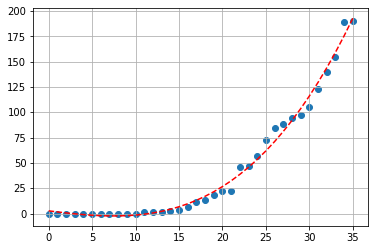

In [23]:
calculate_and_create_chart_for_province(START_DATE, 'Reggio di Calabria')

## Vibo Valentia

Total cases per 1000 inhabitants up to today: 0.2722
Total cases up to today: 44
New cases registered today: 5
New cases registered today in %: 12.82
Doubling time in the last five days: 5.3
Doubling time yesterday: 5.6
Trend of new cases (in %) in the last 5 days: 91.3


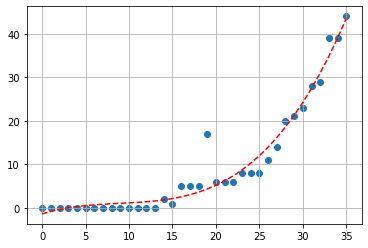

In [24]:
calculate_and_create_chart_for_province(START_DATE, 'Vibo Valentia')

# Casi di COVID-19 in Campania - COVID-19 cases in Campania

Total cases up to today: 1825
New cases registered today: 178
New cases registered today in %: 10.81
Doubling time in the last five days: 8.2
Doubling time yesterday: 8.4
Trend of new cases (in %) in the last 5 days: 52.46


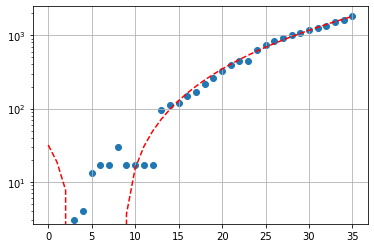

In [25]:
calculate_and_create_chart_for_region(START_DATE, 'Campania')

## Avellino

Total cases per 1000 inhabitants up to today: 0.5195
Total cases up to today: 220
New cases registered today: 12
New cases registered today in %: 5.77
Doubling time in the last five days: 14.1
Doubling time yesterday: 11.8
Trend of new cases (in %) in the last 5 days: 27.91


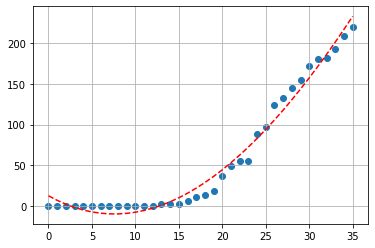

In [26]:
calculate_and_create_chart_for_province(START_DATE, 'Avellino')

## Benevento

Total cases per 1000 inhabitants up to today: 0.2503
Total cases up to today: 70
New cases registered today: 49
New cases registered today in %: 233.33
Doubling time in the last five days: 2.2
Doubling time yesterday: 8.5
Trend of new cases (in %) in the last 5 days: 400.0


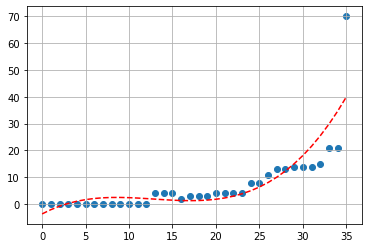

In [27]:
calculate_and_create_chart_for_province(START_DATE, 'Benevento')

## Caserta

Total cases per 1000 inhabitants up to today: 0.2229
Total cases up to today: 206
New cases registered today: 9
New cases registered today in %: 4.57
Doubling time in the last five days: 15.6
Doubling time yesterday: 13.4
Trend of new cases (in %) in the last 5 days: 24.85


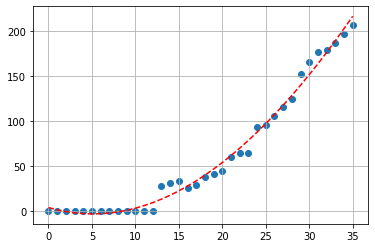

In [28]:
calculate_and_create_chart_for_province(START_DATE, 'Caserta')

## Napoli

Total cases per 1000 inhabitants up to today: 0.319
Total cases up to today: 991
New cases registered today: 93
New cases registered today in %: 10.36
Doubling time in the last five days: 7.5
Doubling time yesterday: 8.2
Trend of new cases (in %) in the last 5 days: 58.31


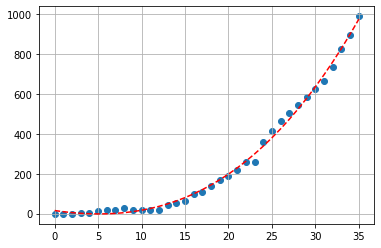

In [29]:
calculate_and_create_chart_for_province(START_DATE, 'Napoli')

## Salerno

Total cases per 1000 inhabitants up to today: 0.306
Total cases up to today: 338
New cases registered today: 15
New cases registered today in %: 4.64
Doubling time in the last five days: 8.1
Doubling time yesterday: 6.0
Trend of new cases (in %) in the last 5 days: 53.64


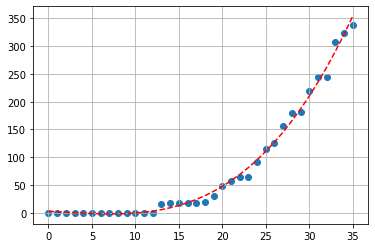

In [30]:
calculate_and_create_chart_for_province(START_DATE, 'Salerno')

# Casi di COVID-19 in Emilia Romagna - COVID-19 cases in Emilia Romagna

Total cases up to today: 13531
New cases registered today: 412
New cases registered today in %: 3.14
Doubling time in the last five days: 11.7
Doubling time yesterday: 9.9
Trend of new cases (in %) in the last 5 days: 34.58


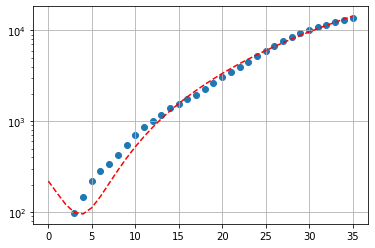

In [31]:
calculate_and_create_chart_for_region(START_DATE, 'Emilia Romagna')

## Bologna

Total cases per 1000 inhabitants up to today: 1.8549
Total cases up to today: 1872
New cases registered today: 129
New cases registered today in %: 7.4
Doubling time in the last five days: 6.6
Doubling time yesterday: 5.9
Trend of new cases (in %) in the last 5 days: 69.11


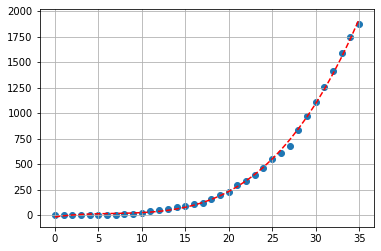

In [32]:
calculate_and_create_chart_for_province(START_DATE, 'Bologna')

## Ferrara

Total cases per 1000 inhabitants up to today: 0.8784
Total cases up to today: 306
New cases registered today: 6
New cases registered today in %: 2.0
Doubling time in the last five days: 8.5
Doubling time yesterday: 7.6
Trend of new cases (in %) in the last 5 days: 50.0


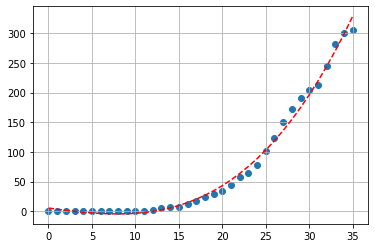

In [33]:
calculate_and_create_chart_for_province(START_DATE, 'Ferrara')

## Modena

Total cases per 1000 inhabitants up to today: 3.0491
Total cases up to today: 2137
New cases registered today: 43
New cases registered today in %: 2.05
Doubling time in the last five days: 10.4
Doubling time yesterday: 7.9
Trend of new cases (in %) in the last 5 days: 39.4


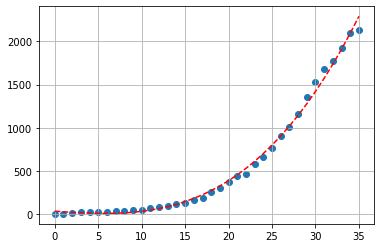

In [34]:
calculate_and_create_chart_for_province(START_DATE, 'Modena')

## Parma

Total cases per 1000 inhabitants up to today: 4.1412
Total cases up to today: 1859
New cases registered today: 50
New cases registered today in %: 2.76
Doubling time in the last five days: 17.5
Doubling time yesterday: 15.0
Trend of new cases (in %) in the last 5 days: 21.9


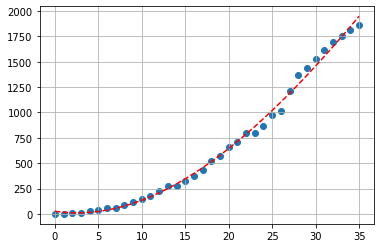

In [35]:
calculate_and_create_chart_for_province(START_DATE, 'Parma')

## Piacenza

Total cases per 1000 inhabitants up to today: 8.7739
Total cases up to today: 2516
New cases registered today: 41
New cases registered today in %: 1.66
Doubling time in the last five days: 20.3
Doubling time yesterday: 15.6
Trend of new cases (in %) in the last 5 days: 18.57


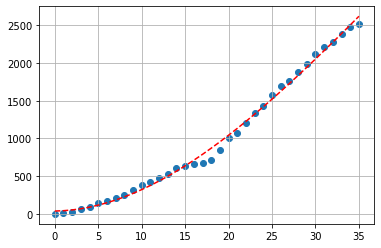

In [36]:
calculate_and_create_chart_for_province(START_DATE, 'Piacenza')

## Ravenna

Total cases per 1000 inhabitants up to today: 1.4511
Total cases up to today: 568
New cases registered today: 15
New cases registered today in %: 2.71
Doubling time in the last five days: 9.0
Doubling time yesterday: 8.5
Trend of new cases (in %) in the last 5 days: 46.77


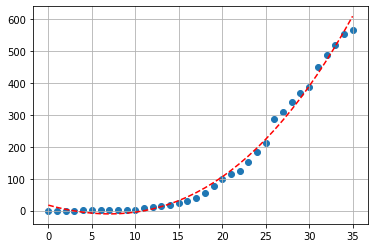

In [37]:
calculate_and_create_chart_for_province(START_DATE, 'Ravenna')

## Reggio nell'Emilia

Total cases per 1000 inhabitants up to today: 4.1466
Total cases up to today: 2208
New cases registered today: 62
New cases registered today in %: 2.89
Doubling time in the last five days: 10.5
Doubling time yesterday: 8.6
Trend of new cases (in %) in the last 5 days: 39.22


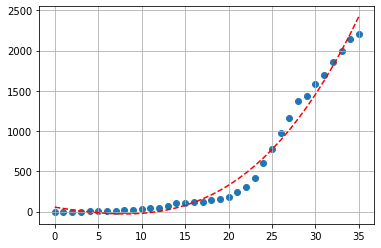

In [38]:
calculate_and_create_chart_for_province(START_DATE, "Reggio nell'Emilia")

## Rimini

Total cases per 1000 inhabitants up to today: 4.1035
Total cases up to today: 1382
New cases registered today: 25
New cases registered today in %: 1.84
Doubling time in the last five days: 17.7
Doubling time yesterday: 15.4
Trend of new cases (in %) in the last 5 days: 21.65


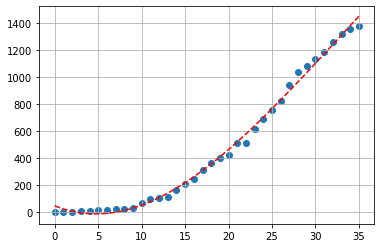

In [39]:
calculate_and_create_chart_for_province(START_DATE, 'Rimini')

# Casi di COVID-19 in Friuli Venezia Giulia - COVID-19 cases in Friuli Venezia Giulia

Total cases up to today: 1492
New cases registered today: 21
New cases registered today in %: 1.43
Doubling time in the last five days: 12.4
Doubling time yesterday: 8.8
Trend of new cases (in %) in the last 5 days: 32.27


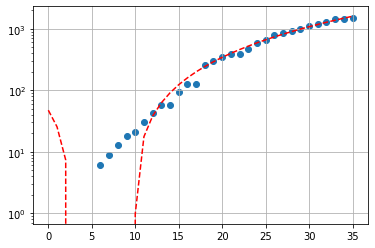

In [40]:
calculate_and_create_chart_for_region(START_DATE, 'Friuli Venezia Giulia')

## Gorizia

Total cases per 1000 inhabitants up to today: 0.6515
Total cases up to today: 91
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 10.3
Doubling time yesterday: 7.4
Trend of new cases (in %) in the last 5 days: 40.0


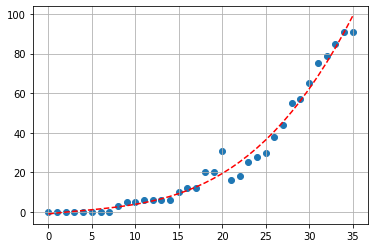

In [41]:
calculate_and_create_chart_for_province(START_DATE, 'Gorizia')

## Pordenone

Total cases per 1000 inhabitants up to today: 1.2274
Total cases up to today: 383
New cases registered today: 15
New cases registered today in %: 4.08
Doubling time in the last five days: 10.7
Doubling time yesterday: 5.7
Trend of new cases (in %) in the last 5 days: 38.27


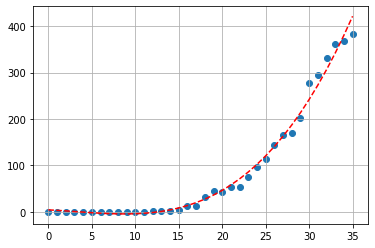

In [42]:
calculate_and_create_chart_for_province(START_DATE, 'Pordenone')

## Trieste

Total cases per 1000 inhabitants up to today: 2.105
Total cases up to today: 494
New cases registered today: 18
New cases registered today in %: 3.78
Doubling time in the last five days: 10.5
Doubling time yesterday: 9.4
Trend of new cases (in %) in the last 5 days: 39.15


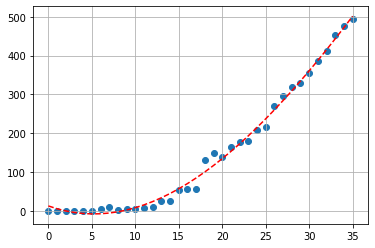

In [43]:
calculate_and_create_chart_for_province(START_DATE, 'Trieste')

## Udine

Total cases per 1000 inhabitants up to today: 0.986
Total cases up to today: 524
New cases registered today: -12
New cases registered today in %: -2.24
Doubling time in the last five days: 17.7
Doubling time yesterday: 12.4
Trend of new cases (in %) in the last 5 days: 21.58


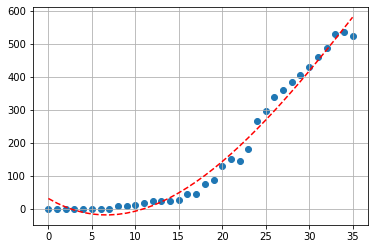

In [44]:
calculate_and_create_chart_for_province(START_DATE, 'Udine')

# Casi di COVID-19 nel Lazio - COVID-19 cases in Lazio

Total cases up to today: 2898
New cases registered today: 207
New cases registered today in %: 7.69
Doubling time in the last five days: 8.1
Doubling time yesterday: 7.7
Trend of new cases (in %) in the last 5 days: 53.09


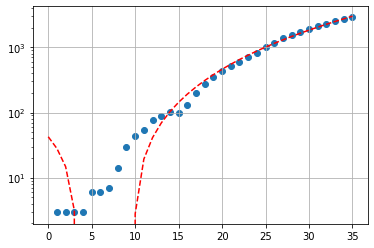

In [45]:
calculate_and_create_chart_for_region(START_DATE, 'Lazio')

## Frosinone

Total cases per 1000 inhabitants up to today: 0.5882
Total cases up to today: 290
New cases registered today: 38
New cases registered today in %: 15.08
Doubling time in the last five days: 3.4
Doubling time yesterday: 3.6
Trend of new cases (in %) in the last 5 days: 173.58


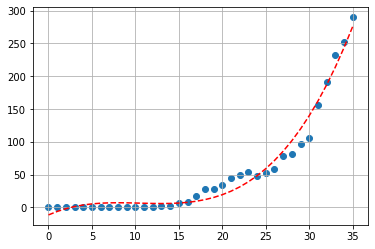

In [46]:
calculate_and_create_chart_for_province(START_DATE, 'Frosinone')

## Latina

Total cases per 1000 inhabitants up to today: 0.4418
Total cases up to today: 254
New cases registered today: 15
New cases registered today in %: 6.28
Doubling time in the last five days: 13.9
Doubling time yesterday: 12.7
Trend of new cases (in %) in the last 5 days: 28.28


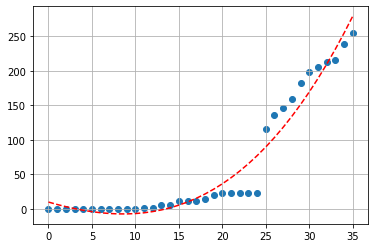

In [47]:
calculate_and_create_chart_for_province(START_DATE, 'Latina')

## Rieti

Total cases per 1000 inhabitants up to today: 0.667
Total cases up to today: 105
New cases registered today: 29
New cases registered today in %: 38.16
Doubling time in the last five days: 3.5
Doubling time yesterday: 4.2
Trend of new cases (in %) in the last 5 days: 169.23


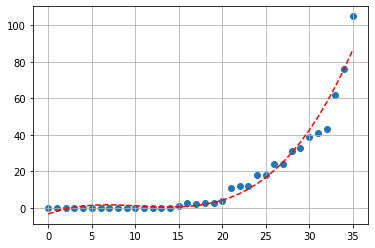

In [48]:
calculate_and_create_chart_for_province(START_DATE, 'Rieti')

## Roma

Total cases per 1000 inhabitants up to today: 0.475
Total cases up to today: 2068
New cases registered today: 123
New cases registered today in %: 6.32
Doubling time in the last five days: 9.4
Doubling time yesterday: 8.4
Trend of new cases (in %) in the last 5 days: 44.82


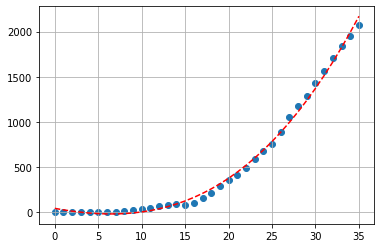

In [49]:
calculate_and_create_chart_for_province(START_DATE, 'Roma')

## Viterbo

Total cases per 1000 inhabitants up to today: 0.5674
Total cases up to today: 181
New cases registered today: 2
New cases registered today in %: 1.12
Doubling time in the last five days: 8.8
Doubling time yesterday: 8.9
Trend of new cases (in %) in the last 5 days: 48.36


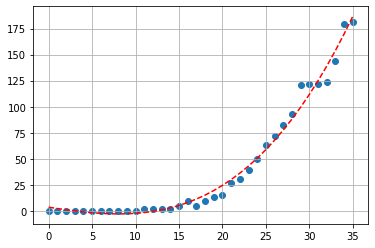

In [50]:
calculate_and_create_chart_for_province(START_DATE, 'Viterbo')

# Casi di COVID-19 in Liguria - COVID-19 cases in Liguria

Total cases up to today: 1795
New cases registered today: 63
New cases registered today in %: 3.64
Doubling time in the last five days: 10.9
Doubling time yesterday: 9.2
Trend of new cases (in %) in the last 5 days: 37.44


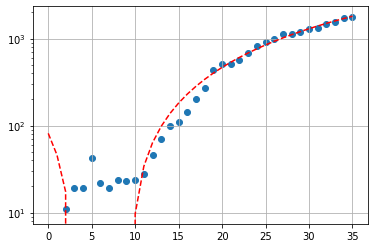

In [51]:
calculate_and_create_chart_for_region(START_DATE, 'Liguria')

## Genova

Total cases per 1000 inhabitants up to today: 1.2575
Total cases up to today: 1069
New cases registered today: 43
New cases registered today in %: 4.19
Doubling time in the last five days: 11.1
Doubling time yesterday: 8.9
Trend of new cases (in %) in the last 5 days: 36.7


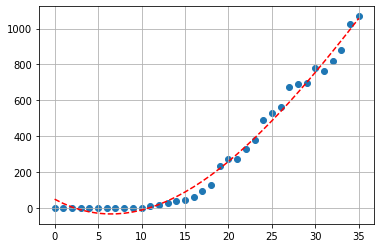

In [52]:
calculate_and_create_chart_for_province(START_DATE, 'Genova')

## Imperia

Total cases per 1000 inhabitants up to today: 1.1295
Total cases up to today: 243
New cases registered today: 9
New cases registered today in %: 3.85
Doubling time in the last five days: 10.9
Doubling time yesterday: 15.1
Trend of new cases (in %) in the last 5 days: 37.29


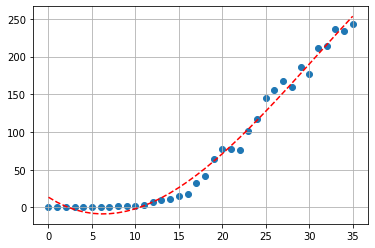

In [53]:
calculate_and_create_chart_for_province(START_DATE, 'Imperia')

## La Spezia

Total cases per 1000 inhabitants up to today: 1.0603
Total cases up to today: 234
New cases registered today: 1
New cases registered today in %: 0.43
Doubling time in the last five days: 6.5
Doubling time yesterday: 4.3
Trend of new cases (in %) in the last 5 days: 70.8


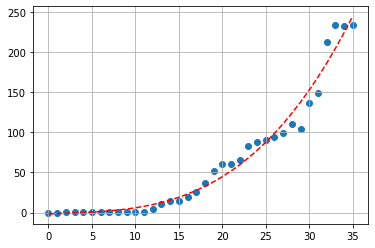

In [54]:
calculate_and_create_chart_for_province(START_DATE, 'La Spezia')

## Savona

Total cases per 1000 inhabitants up to today: 0.8912
Total cases up to today: 249
New cases registered today: 10
New cases registered today in %: 4.18
Doubling time in the last five days: 20.3
Doubling time yesterday: 21.9
Trend of new cases (in %) in the last 5 days: 18.57


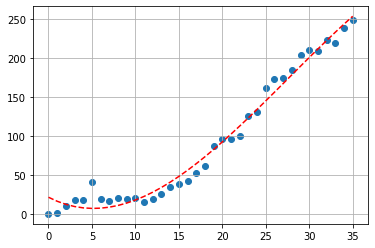

In [55]:
calculate_and_create_chart_for_province(START_DATE, 'Savona')

# Casi di COVID-19 in Lombardia - COVID-19 cases in Lombardy

Total cases up to today: 41253
New cases registered today: 1147
New cases registered today in %: 2.86
Doubling time in the last five days: 13.1
Doubling time yesterday: 12.0
Trend of new cases (in %) in the last 5 days: 30.31


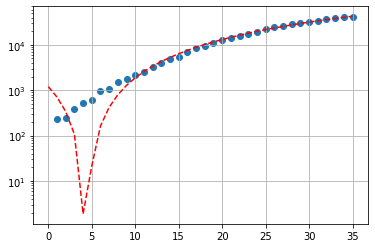

In [56]:
calculate_and_create_chart_for_region(START_DATE, 'Lombardia')

## Bergamo

Total cases per 1000 inhabitants up to today: 7.8059
Total cases up to today: 8664
New cases registered today: 137
New cases registered today in %: 1.61
Doubling time in the last five days: 17.1
Doubling time yesterday: 14.6
Trend of new cases (in %) in the last 5 days: 22.51


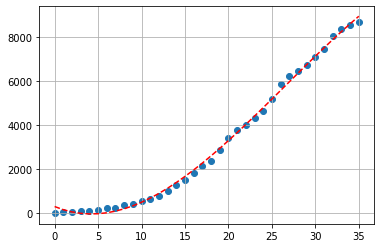

In [57]:
calculate_and_create_chart_for_province(START_DATE, 'Bergamo')

## Brescia

Total cases per 1000 inhabitants up to today: 6.5063
Total cases up to today: 8213
New cases registered today: 200
New cases registered today in %: 2.5
Doubling time in the last five days: 15.8
Doubling time yesterday: 14.4
Trend of new cases (in %) in the last 5 days: 24.5


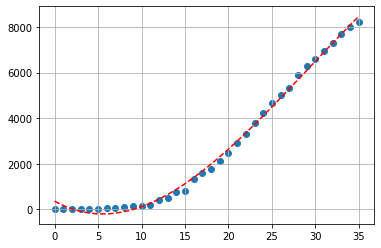

In [58]:
calculate_and_create_chart_for_province(START_DATE, 'Brescia')

## Como

Total cases per 1000 inhabitants up to today: 1.7678
Total cases up to today: 1061
New cases registered today: 47
New cases registered today in %: 4.64
Doubling time in the last five days: 8.5
Doubling time yesterday: 7.4
Trend of new cases (in %) in the last 5 days: 50.28


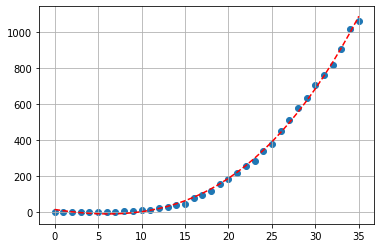

In [59]:
calculate_and_create_chart_for_province(START_DATE, 'Como')

## Cremona

Total cases per 1000 inhabitants up to today: 10.5401
Total cases up to today: 3788
New cases registered today: 26
New cases registered today in %: 0.69
Doubling time in the last five days: 19.0
Doubling time yesterday: 16.8
Trend of new cases (in %) in the last 5 days: 20.03


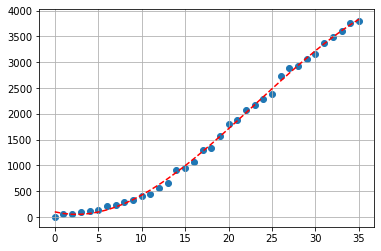

In [60]:
calculate_and_create_chart_for_province(START_DATE, 'Cremona')

## Lecco

Total cases per 1000 inhabitants up to today: 4.236
Total cases up to today: 1437
New cases registered today: 56
New cases registered today in %: 4.06
Doubling time in the last five days: 12.0
Doubling time yesterday: 11.3
Trend of new cases (in %) in the last 5 days: 33.55


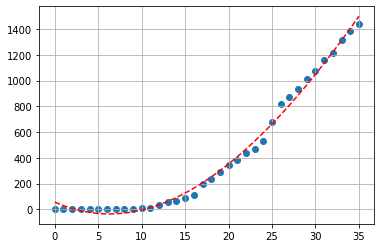

In [61]:
calculate_and_create_chart_for_province(START_DATE, 'Lecco')

## Lodi

Total cases per 1000 inhabitants up to today: 9.1001
Total cases up to today: 2087
New cases registered today: 30
New cases registered today in %: 1.46
Doubling time in the last five days: 33.9
Doubling time yesterday: 34.4
Trend of new cases (in %) in the last 5 days: 10.77


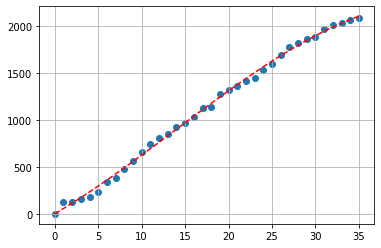

In [62]:
calculate_and_create_chart_for_province(START_DATE, 'Lodi')

## Mantova

Total cases per 1000 inhabitants up to today: 3.919
Total cases up to today: 1617
New cases registered today: 67
New cases registered today in %: 4.32
Doubling time in the last five days: 10.9
Doubling time yesterday: 9.9
Trend of new cases (in %) in the last 5 days: 37.5


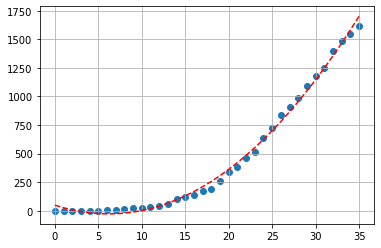

In [63]:
calculate_and_create_chart_for_province(START_DATE, 'Mantova')

## Milano

Total cases per 1000 inhabitants up to today: 2.6959
Total cases up to today: 8676
New cases registered today: 347
New cases registered today in %: 4.17
Doubling time in the last five days: 9.7
Doubling time yesterday: 9.1
Trend of new cases (in %) in the last 5 days: 42.84


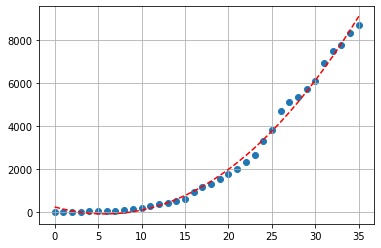

In [64]:
calculate_and_create_chart_for_province(START_DATE, 'Milano')

## Monza e della Brianza

Total cases per 1000 inhabitants up to today: 2.7185
Total cases up to today: 2362
New cases registered today: 97
New cases registered today in %: 4.28
Doubling time in the last five days: 8.7
Doubling time yesterday: 7.8
Trend of new cases (in %) in the last 5 days: 48.83


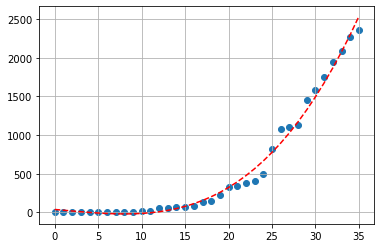

In [65]:
calculate_and_create_chart_for_province(START_DATE, 'Monza e della Brianza')

## Pavia

Total cases per 1000 inhabitants up to today: 3.7204
Total cases up to today: 2036
New cases registered today: 62
New cases registered today in %: 3.14
Doubling time in the last five days: 13.6
Doubling time yesterday: 12.6
Trend of new cases (in %) in the last 5 days: 29.02


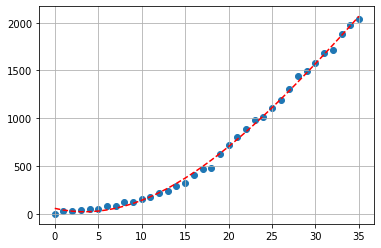

In [66]:
calculate_and_create_chart_for_province(START_DATE, 'Pavia')

## Sondrio

Total cases per 1000 inhabitants up to today: 2.4582
Total cases up to today: 446
New cases registered today: 24
New cases registered today in %: 5.69
Doubling time in the last five days: 7.7
Doubling time yesterday: 6.8
Trend of new cases (in %) in the last 5 days: 57.04


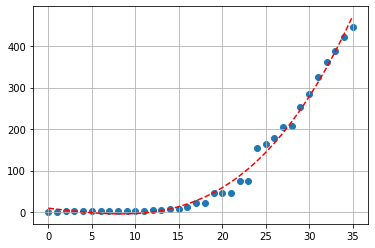

In [67]:
calculate_and_create_chart_for_province(START_DATE, 'Sondrio')

## Varese

Total cases per 1000 inhabitants up to today: 0.973
Total cases up to today: 866
New cases registered today: 54
New cases registered today in %: 6.65
Doubling time in the last five days: 5.6
Doubling time yesterday: 5.9
Trend of new cases (in %) in the last 5 days: 85.04


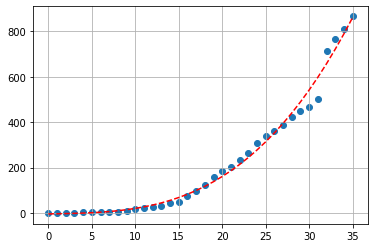

In [68]:
calculate_and_create_chart_for_province(START_DATE, 'Varese')

# Casi di COVID-19 nelle Marche - COVID-19 cases in Marche

Total cases up to today: 3619
New cases registered today: 122
New cases registered today in %: 3.49
Doubling time in the last five days: 15.3
Doubling time yesterday: 13.3
Trend of new cases (in %) in the last 5 days: 25.36


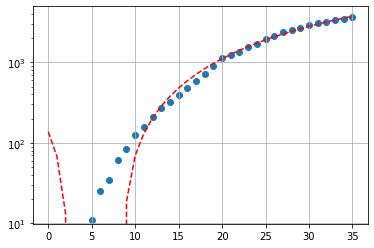

In [69]:
calculate_and_create_chart_for_region(START_DATE, 'Marche')

## Ancona

Total cases per 1000 inhabitants up to today: 2.2357
Total cases up to today: 1060
New cases registered today: 41
New cases registered today in %: 4.02
Doubling time in the last five days: 13.5
Doubling time yesterday: 11.4
Trend of new cases (in %) in the last 5 days: 29.27


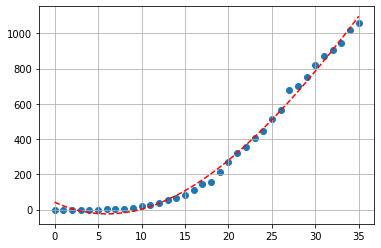

In [70]:
calculate_and_create_chart_for_province(START_DATE, 'Ancona')

## Ascoli Piceno

Total cases per 1000 inhabitants up to today: 0.9406
Total cases up to today: 197
New cases registered today: 18
New cases registered today in %: 10.06
Doubling time in the last five days: 3.8
Doubling time yesterday: 3.4
Trend of new cases (in %) in the last 5 days: 146.25


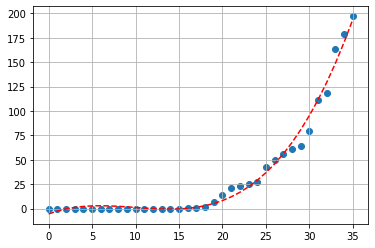

In [71]:
calculate_and_create_chart_for_province(START_DATE, 'Ascoli Piceno')

## Fermo

Total cases per 1000 inhabitants up to today: 1.4069
Total cases up to today: 246
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 8.1
Doubling time yesterday: 6.1
Trend of new cases (in %) in the last 5 days: 53.75


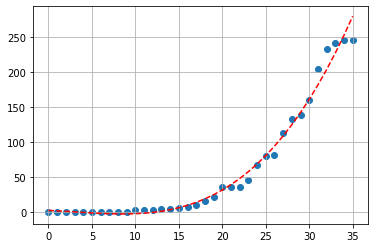

In [72]:
calculate_and_create_chart_for_province(START_DATE, 'Fermo')

## Macerata

Total cases per 1000 inhabitants up to today: 1.4957
Total cases up to today: 477
New cases registered today: 1
New cases registered today in %: 0.21
Doubling time in the last five days: 18.4
Doubling time yesterday: 13.5
Trend of new cases (in %) in the last 5 days: 20.76


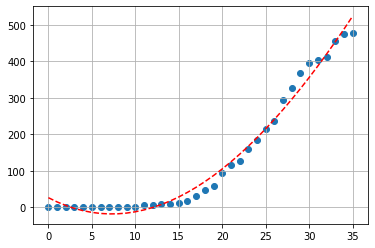

In [73]:
calculate_and_create_chart_for_province(START_DATE, 'Macerata')

## Pesaro e Urbino

Total cases per 1000 inhabitants up to today: 4.5438
Total cases up to today: 1639
New cases registered today: 62
New cases registered today in %: 3.93
Doubling time in the last five days: 25.7
Doubling time yesterday: 24.8
Trend of new cases (in %) in the last 5 days: 14.46


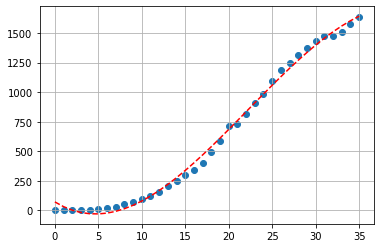

In [74]:
calculate_and_create_chart_for_province(START_DATE, 'Pesaro e Urbino')

# Casi di COVID-19 in Molise - COVID-19 cases in Molise¶

Total cases up to today: 123
New cases registered today: 6
New cases registered today in %: 5.13
Doubling time in the last five days: 5.3
Doubling time yesterday: 5.7
Trend of new cases (in %) in the last 5 days: 92.19


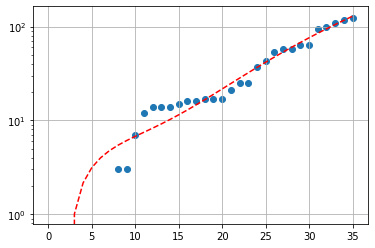

In [75]:
calculate_and_create_chart_for_region(START_DATE, 'Molise')

## Campobasso

Total cases per 1000 inhabitants up to today: 0.5075
Total cases up to today: 114
New cases registered today: 6
New cases registered today in %: 5.56
Doubling time in the last five days: 5.4
Doubling time yesterday: 5.9
Trend of new cases (in %) in the last 5 days: 90.0


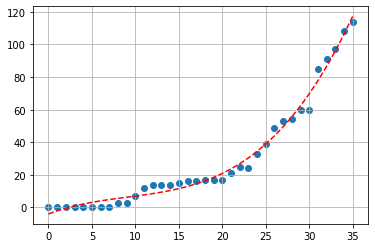

In [76]:
calculate_and_create_chart_for_province(START_DATE, 'Campobasso')

## Isernia

Total cases per 1000 inhabitants up to today: 0.1049
Total cases up to today: 9
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 4.3
Doubling time yesterday: 4.3
Trend of new cases (in %) in the last 5 days: 125.0


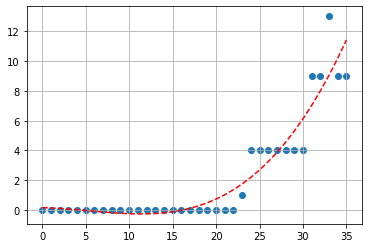

In [77]:
calculate_and_create_chart_for_province(START_DATE, 'Isernia')

# Casi di COVID-19 in Piemonte - COVID-19 cases in Piedmont 

Total cases up to today: 8511
New cases registered today: 499
New cases registered today in %: 6.23
Doubling time in the last five days: 9.3
Doubling time yesterday: 8.6
Trend of new cases (in %) in the last 5 days: 45.24


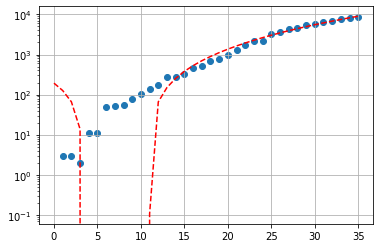

In [78]:
calculate_and_create_chart_for_region(START_DATE, 'Piemonte')

## Alessandria

Total cases per 1000 inhabitants up to today: 3.0001
Total cases up to today: 1280
New cases registered today: 25
New cases registered today in %: 1.99
Doubling time in the last five days: 11.5
Doubling time yesterday: 12.3
Trend of new cases (in %) in the last 5 days: 35.31


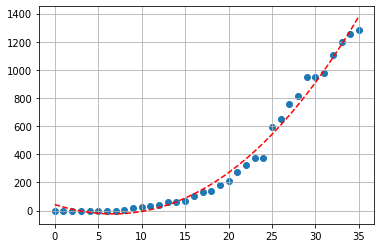

In [79]:
calculate_and_create_chart_for_province(START_DATE, 'Alessandria')

## Asti

Total cases per 1000 inhabitants up to today: 1.8553
Total cases up to today: 402
New cases registered today: 74
New cases registered today in %: 22.56
Doubling time in the last five days: 8.0
Doubling time yesterday: 10.4
Trend of new cases (in %) in the last 5 days: 54.02


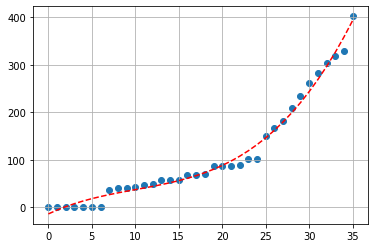

In [80]:
calculate_and_create_chart_for_province(START_DATE, 'Asti')

## Biella

Total cases per 1000 inhabitants up to today: 2.6379
Total cases up to today: 471
New cases registered today: 32
New cases registered today in %: 7.29
Doubling time in the last five days: 9.5
Doubling time yesterday: 7.7
Trend of new cases (in %) in the last 5 days: 44.04


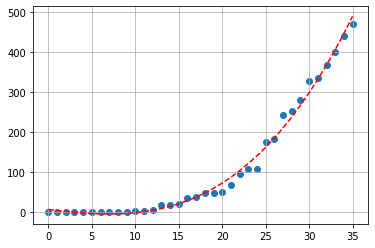

In [81]:
calculate_and_create_chart_for_province(START_DATE, 'Biella')

## Cuneo

Total cases per 1000 inhabitants up to today: 1.1034
Total cases up to today: 650
New cases registered today: 59
New cases registered today in %: 9.98
Doubling time in the last five days: 8.9
Doubling time yesterday: 9.4
Trend of new cases (in %) in the last 5 days: 47.39


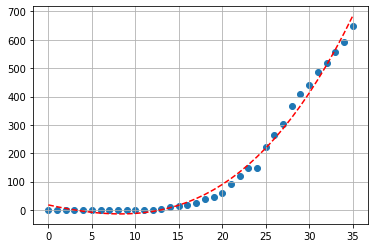

In [82]:
calculate_and_create_chart_for_province(START_DATE, 'Cuneo')

## Novara

Total cases per 1000 inhabitants up to today: 1.9803
Total cases up to today: 733
New cases registered today: 39
New cases registered today in %: 5.62
Doubling time in the last five days: 9.9
Doubling time yesterday: 8.9
Trend of new cases (in %) in the last 5 days: 41.78


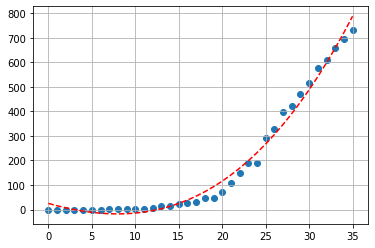

In [83]:
calculate_and_create_chart_for_province(START_DATE, 'Novara')

## Torino

Total cases per 1000 inhabitants up to today: 1.8219
Total cases up to today: 4150
New cases registered today: 217
New cases registered today in %: 5.52
Doubling time in the last five days: 8.9
Doubling time yesterday: 7.6
Trend of new cases (in %) in the last 5 days: 47.53


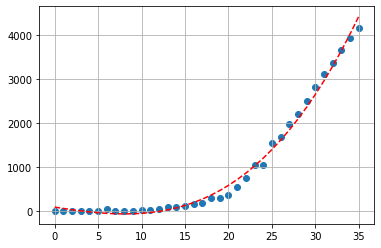

In [84]:
calculate_and_create_chart_for_province(START_DATE, 'Torino')

## 	Verbano-Cusio-Ossola

Total cases per 1000 inhabitants up to today: 2.3549
Total cases up to today: 376
New cases registered today: 30
New cases registered today in %: 8.67
Doubling time in the last five days: 8.2
Doubling time yesterday: 8.4
Trend of new cases (in %) in the last 5 days: 52.23


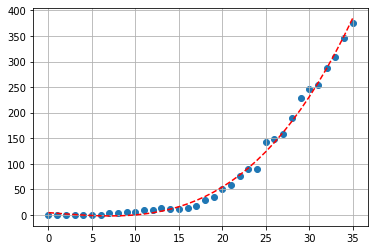

In [85]:
calculate_and_create_chart_for_province(START_DATE, 'Verbano-Cusio-Ossola')

## Vercelli

Total cases per 1000 inhabitants up to today: 2.5824
Total cases up to today: 449
New cases registered today: 23
New cases registered today in %: 5.4
Doubling time in the last five days: 9.2
Doubling time yesterday: 9.0
Trend of new cases (in %) in the last 5 days: 45.78


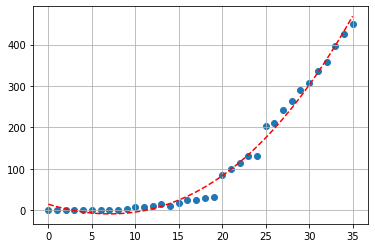

In [86]:
calculate_and_create_chart_for_province(START_DATE, 'Vercelli')

# Casi di COVID-19 in Puglia - COVID-19 cases in Apulia

Total cases up to today: 1680
New cases registered today: 197
New cases registered today in %: 13.28
Doubling time in the last five days: 6.9
Doubling time yesterday: 7.5
Trend of new cases (in %) in the last 5 days: 65.68


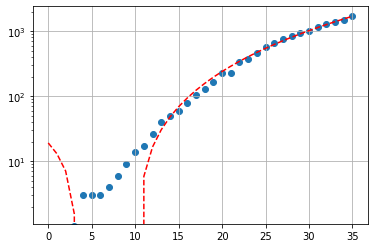

In [87]:
calculate_and_create_chart_for_region(START_DATE, 'Puglia')

## Bari

Total cases per 1000 inhabitants up to today: 0.4714
Total cases up to today: 594
New cases registered today: 76
New cases registered today in %: 14.67
Doubling time in the last five days: 6.1
Doubling time yesterday: 6.5
Trend of new cases (in %) in the last 5 days: 76.79


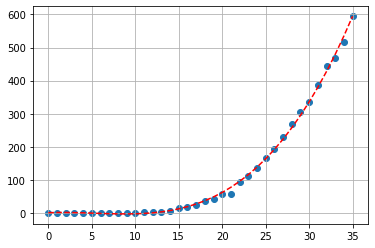

In [88]:
calculate_and_create_chart_for_province(START_DATE, 'Bari')

## 	Barletta-Andria-Trani

Total cases per 1000 inhabitants up to today: 0.2624
Total cases up to today: 103
New cases registered today: 5
New cases registered today in %: 5.1
Doubling time in the last five days: 7.5
Doubling time yesterday: 7.6
Trend of new cases (in %) in the last 5 days: 58.46


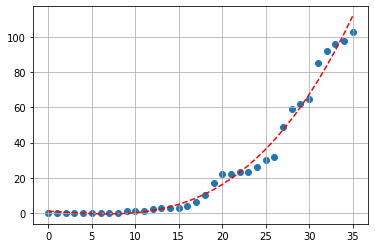

In [89]:
calculate_and_create_chart_for_province(START_DATE, 'Barletta-Andria-Trani')

## Brindisi

Total cases per 1000 inhabitants up to today: 0.413
Total cases up to today: 164
New cases registered today: 12
New cases registered today in %: 7.89
Doubling time in the last five days: 10.0
Doubling time yesterday: 8.9
Trend of new cases (in %) in the last 5 days: 41.38


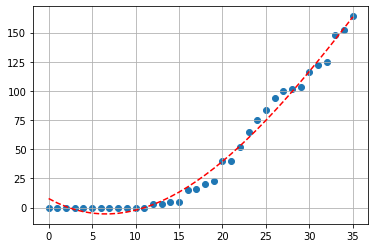

In [90]:
calculate_and_create_chart_for_province(START_DATE, 'Brindisi')

## Foggia

Total cases per 1000 inhabitants up to today: 0.6443
Total cases up to today: 405
New cases registered today: 28
New cases registered today in %: 7.43
Doubling time in the last five days: 9.1
Doubling time yesterday: 8.9
Trend of new cases (in %) in the last 5 days: 46.21


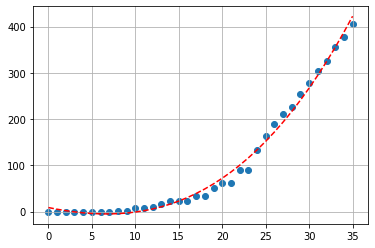

In [91]:
calculate_and_create_chart_for_province(START_DATE, 'Foggia')

## Lecce

Total cases per 1000 inhabitants up to today: 0.3653
Total cases up to today: 293
New cases registered today: 54
New cases registered today in %: 22.59
Doubling time in the last five days: 6.0
Doubling time yesterday: 8.8
Trend of new cases (in %) in the last 5 days: 78.66


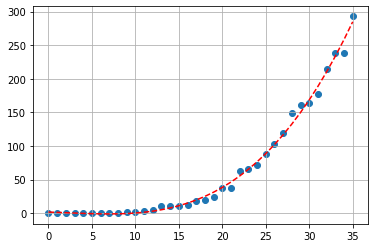

In [92]:
calculate_and_create_chart_for_province(START_DATE, 'Lecce')

## Taranto

Total cases per 1000 inhabitants up to today: 0.2074
Total cases up to today: 121
New cases registered today: 22
New cases registered today in %: 22.22
Doubling time in the last five days: 4.5
Doubling time yesterday: 5.2
Trend of new cases (in %) in the last 5 days: 116.07


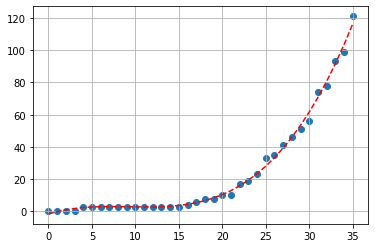

In [93]:
calculate_and_create_chart_for_province(START_DATE, 'Taranto')

# Casi di COVID-19 in Sardegna - COVID-19 cases in Sardinia

Total cases up to today: 682
New cases registered today: 44
New cases registered today in %: 6.9
Doubling time in the last five days: 8.0
Doubling time yesterday: 8.3
Trend of new cases (in %) in the last 5 days: 54.3


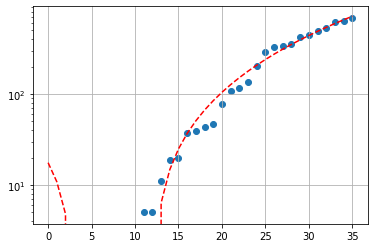

In [94]:
calculate_and_create_chart_for_region(START_DATE, 'Sardegna')

## Cagliari

Total cases per 1000 inhabitants up to today: 0.1838
Total cases up to today: 103
New cases registered today: 1
New cases registered today in %: 0.98
Doubling time in the last five days: 10.5
Doubling time yesterday: 7.4
Trend of new cases (in %) in the last 5 days: 39.19


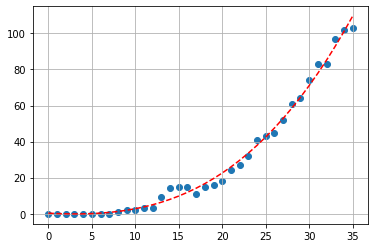

In [95]:
calculate_and_create_chart_for_province(START_DATE, 'Cagliari')

## Nuoro

Total cases per 1000 inhabitants up to today: 0.3652
Total cases up to today: 57
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 4.4
Doubling time yesterday: 4.4
Trend of new cases (in %) in the last 5 days: 119.23


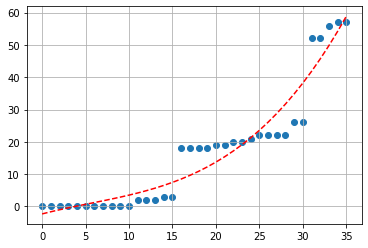

In [96]:
calculate_and_create_chart_for_province(START_DATE, 'Nuoro')

## Oristano

Total cases per 1000 inhabitants up to today: 0.0622
Total cases up to today: 10
New cases registered today: 1
New cases registered today in %: 11.11
Doubling time in the last five days: 9.7
Doubling time yesterday: 13.8
Trend of new cases (in %) in the last 5 days: 42.86


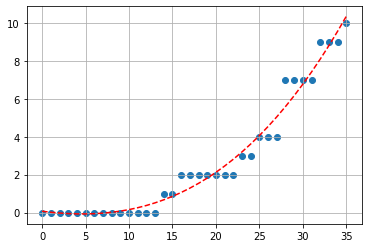

In [97]:
calculate_and_create_chart_for_province(START_DATE, 'Oristano')

## Sassari

Total cases per 1000 inhabitants up to today: 1.3629
Total cases up to today: 454
New cases registered today: 39
New cases registered today in %: 9.4
Doubling time in the last five days: 9.7
Doubling time yesterday: 11.8
Trend of new cases (in %) in the last 5 days: 42.77


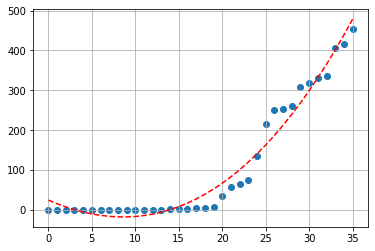

In [98]:
calculate_and_create_chart_for_province(START_DATE, 'Sassari')

# Casi di COVID-19 in Sicilia - COVID-19 cases in Sicily

Total cases up to today: 1555
New cases registered today: 95
New cases registered today in %: 6.51
Doubling time in the last five days: 7.7
Doubling time yesterday: 6.4
Trend of new cases (in %) in the last 5 days: 56.44


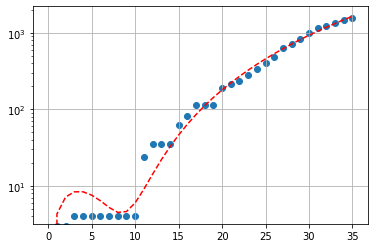

In [99]:
calculate_and_create_chart_for_region(START_DATE, 'Sicilia')

## Agrigento

Total cases per 1000 inhabitants up to today: 0.2013
Total cases up to today: 89
New cases registered today: 11
New cases registered today in %: 14.1
Doubling time in the last five days: 6.0
Doubling time yesterday: 6.8
Trend of new cases (in %) in the last 5 days: 78.0


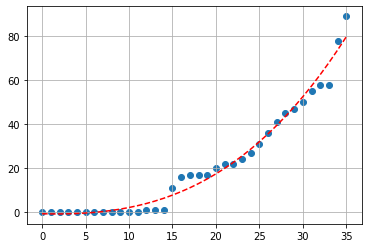

In [100]:
calculate_and_create_chart_for_province(START_DATE, 'Agrigento')

## Caltanissetta

Total cases per 1000 inhabitants up to today: 0.2595
Total cases up to today: 70
New cases registered today: 2
New cases registered today in %: 2.94
Doubling time in the last five days: 7.8
Doubling time yesterday: 6.5
Trend of new cases (in %) in the last 5 days: 55.56


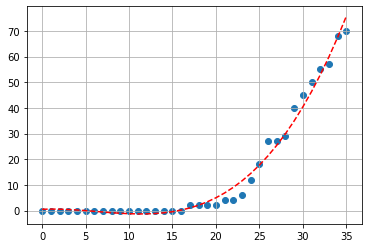

In [101]:
calculate_and_create_chart_for_province(START_DATE, 'Caltanissetta')

## Catania

Total cases per 1000 inhabitants up to today: 0.4024
Total cases up to today: 448
New cases registered today: 41
New cases registered today in %: 10.07
Doubling time in the last five days: 9.2
Doubling time yesterday: 9.8
Trend of new cases (in %) in the last 5 days: 45.45


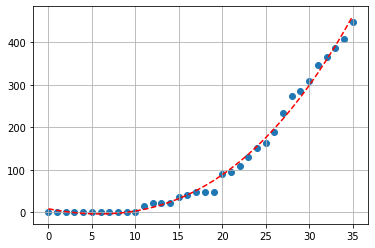

In [102]:
calculate_and_create_chart_for_province(START_DATE, 'Catania')

## Enna

Total cases per 1000 inhabitants up to today: 1.1604
Total cases up to today: 195
New cases registered today: 3
New cases registered today in %: 1.56
Doubling time in the last five days: 4.5
Doubling time yesterday: 3.1
Trend of new cases (in %) in the last 5 days: 116.67


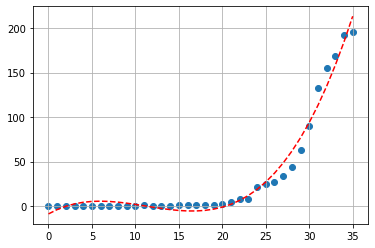

In [103]:
calculate_and_create_chart_for_province(START_DATE, 'Enna')

## Messina

Total cases per 1000 inhabitants up to today: 0.4791
Total cases up to today: 305
New cases registered today: 16
New cases registered today in %: 5.54
Doubling time in the last five days: 6.2
Doubling time yesterday: 4.7
Trend of new cases (in %) in the last 5 days: 75.29


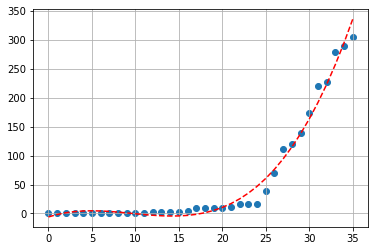

In [104]:
calculate_and_create_chart_for_province(START_DATE, 'Messina')

## Palermo

Total cases per 1000 inhabitants up to today: 0.1995
Total cases up to today: 253
New cases registered today: 17
New cases registered today in %: 7.2
Doubling time in the last five days: 12.8
Doubling time yesterday: 10.6
Trend of new cases (in %) in the last 5 days: 31.09


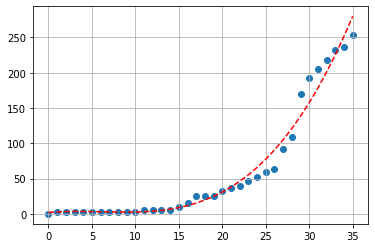

In [105]:
calculate_and_create_chart_for_province(START_DATE, 'Palermo')

## Ragusa

Total cases per 1000 inhabitants up to today: 0.1089
Total cases up to today: 35
New cases registered today: 3
New cases registered today in %: 9.38
Doubling time in the last five days: 7.5
Doubling time yesterday: 2.7
Trend of new cases (in %) in the last 5 days: 59.09


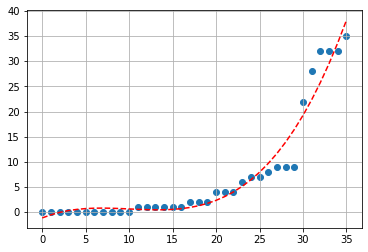

In [106]:
calculate_and_create_chart_for_province(START_DATE, 'Ragusa')

## Siracusa

Total cases per 1000 inhabitants up to today: 0.2209
Total cases up to today: 89
New cases registered today: 2
New cases registered today in %: 2.3
Doubling time in the last five days: 10.5
Doubling time yesterday: 6.0
Trend of new cases (in %) in the last 5 days: 39.06


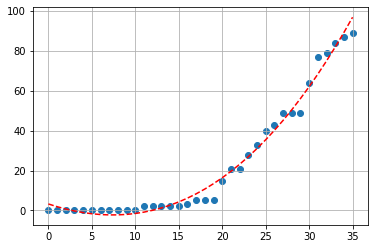

In [107]:
calculate_and_create_chart_for_province(START_DATE, 'Siracusa')

## Trapani

Total cases per 1000 inhabitants up to today: 0.1634
Total cases up to today: 71
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 8.9
Doubling time yesterday: 6.9
Trend of new cases (in %) in the last 5 days: 47.92


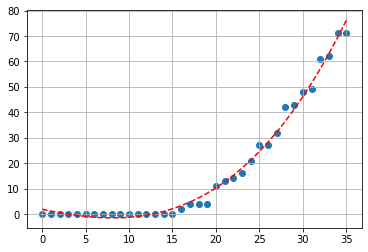

In [108]:
calculate_and_create_chart_for_province(START_DATE, 'Trapani')

# Casi di COVID-19 in Toscana - COVID-19 cases in Tuscany

Total cases up to today: 4412
New cases registered today: 290
New cases registered today in %: 7.04
Doubling time in the last five days: 8.8
Doubling time yesterday: 8.2
Trend of new cases (in %) in the last 5 days: 48.45


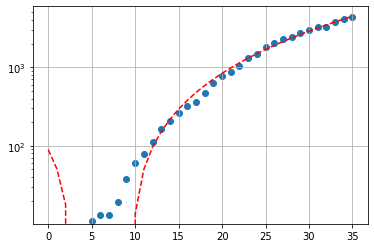

In [109]:
calculate_and_create_chart_for_region(START_DATE, 'Toscana')

## Arezzo

Total cases per 1000 inhabitants up to today: 0.9002
Total cases up to today: 310
New cases registered today: 26
New cases registered today in %: 9.15
Doubling time in the last five days: 11.4
Doubling time yesterday: 11.7
Trend of new cases (in %) in the last 5 days: 35.37


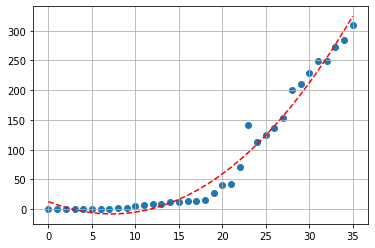

In [110]:
calculate_and_create_chart_for_province(START_DATE, 'Arezzo')

## Firenze

Total cases per 1000 inhabitants up to today: 1.0075
Total cases up to today: 1022
New cases registered today: 65
New cases registered today in %: 6.79
Doubling time in the last five days: 9.5
Doubling time yesterday: 8.0
Trend of new cases (in %) in the last 5 days: 44.15


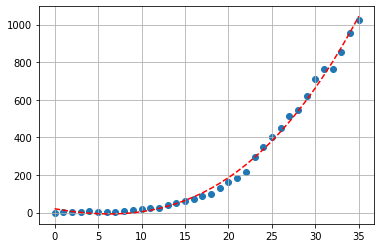

In [111]:
calculate_and_create_chart_for_province(START_DATE, 'Firenze')

## Grosseto

Total cases per 1000 inhabitants up to today: 1.1253
Total cases up to today: 251
New cases registered today: 6
New cases registered today in %: 2.45
Doubling time in the last five days: 6.5
Doubling time yesterday: 6.2
Trend of new cases (in %) in the last 5 days: 70.75


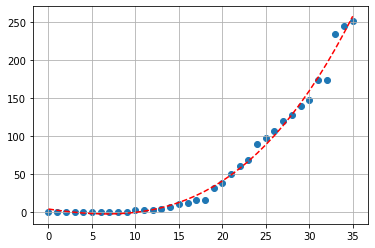

In [112]:
calculate_and_create_chart_for_province(START_DATE, 'Grosseto')

## Livorno

Total cases per 1000 inhabitants up to today: 0.8034
Total cases up to today: 271
New cases registered today: 35
New cases registered today in %: 14.83
Doubling time in the last five days: 8.4
Doubling time yesterday: 9.2
Trend of new cases (in %) in the last 5 days: 51.4


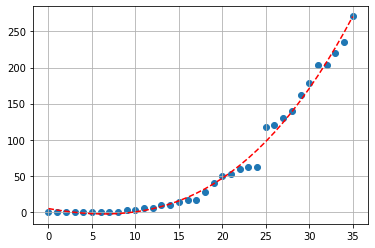

In [113]:
calculate_and_create_chart_for_province(START_DATE, 'Livorno')

## Lucca

Total cases per 1000 inhabitants up to today: 1.8229
Total cases up to today: 711
New cases registered today: 39
New cases registered today in %: 5.8
Doubling time in the last five days: 7.1
Doubling time yesterday: 6.3
Trend of new cases (in %) in the last 5 days: 63.07


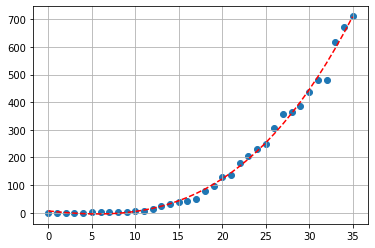

In [114]:
calculate_and_create_chart_for_province(START_DATE, 'Lucca')

## Massa Carrara

Total cases per 1000 inhabitants up to today: 2.7622
Total cases up to today: 543
New cases registered today: 50
New cases registered today in %: 10.14
Doubling time in the last five days: 7.0
Doubling time yesterday: 7.7
Trend of new cases (in %) in the last 5 days: 64.55


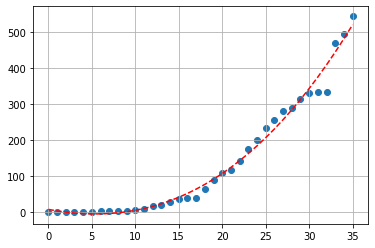

In [115]:
calculate_and_create_chart_for_province(START_DATE, 'Massa Carrara')

## Pisa

Total cases per 1000 inhabitants up to today: 1.0572
Total cases up to today: 446
New cases registered today: 14
New cases registered today in %: 3.24
Doubling time in the last five days: 10.2
Doubling time yesterday: 8.3
Trend of new cases (in %) in the last 5 days: 40.69


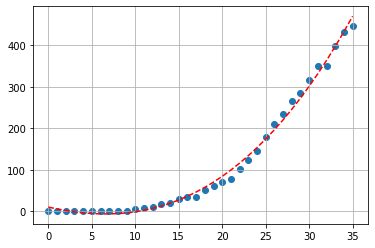

In [116]:
calculate_and_create_chart_for_province(START_DATE, 'Pisa')

## Pistoia

Total cases per 1000 inhabitants up to today: 1.1102
Total cases up to today: 324
New cases registered today: 15
New cases registered today in %: 4.85
Doubling time in the last five days: 14.2
Doubling time yesterday: 14.4
Trend of new cases (in %) in the last 5 days: 27.56


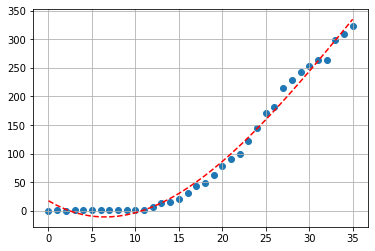

In [117]:
calculate_and_create_chart_for_province(START_DATE, 'Pistoia')

## Prato

Total cases per 1000 inhabitants up to today: 0.974
Total cases up to today: 248
New cases registered today: 27
New cases registered today in %: 12.22
Doubling time in the last five days: 10.5
Doubling time yesterday: 10.5
Trend of new cases (in %) in the last 5 days: 39.33


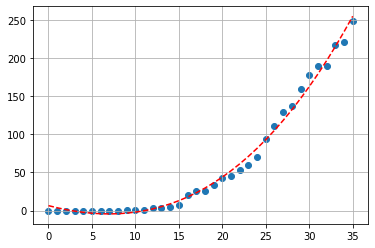

In [118]:
calculate_and_create_chart_for_province(START_DATE, 'Prato')

## Siena

Total cases per 1000 inhabitants up to today: 1.0658
Total cases up to today: 286
New cases registered today: 13
New cases registered today in %: 4.76
Doubling time in the last five days: 8.8
Doubling time yesterday: 7.9
Trend of new cases (in %) in the last 5 days: 48.19


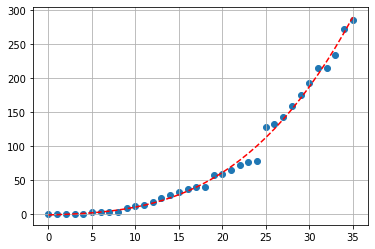

In [119]:
calculate_and_create_chart_for_province(START_DATE, 'Siena')

# Casi di COVID-19 in Provincia Autonoma di Trento - COVID-19 cases in the Autonomous Province of Trento

Total cases per 1000 inhabitants up to today: 3.1229
Total cases up to today: 1682
New cases registered today: 88
New cases registered today in %: 5.52
Doubling time in the last five days: 10.8
Doubling time yesterday: 9.6
Trend of new cases (in %) in the last 5 days: 37.64


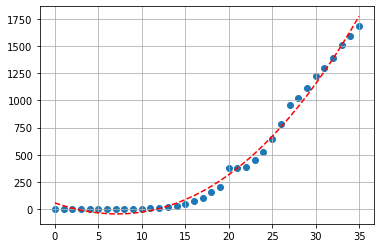

In [120]:
calculate_and_create_chart_for_province(START_DATE, 'Trento')

# Casi di COVID-19 in Umbria - COVID-19 cases in Umbria

Total cases up to today: 1018
New cases registered today: 25
New cases registered today in %: 2.52
Doubling time in the last five days: 8.8
Doubling time yesterday: 7.5
Trend of new cases (in %) in the last 5 days: 48.4


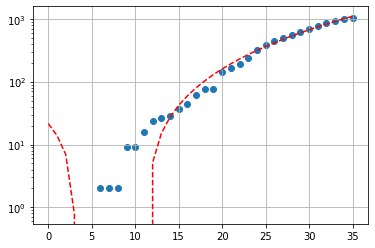

In [121]:
calculate_and_create_chart_for_region(START_DATE, 'Umbria')

## Perugia

Total cases per 1000 inhabitants up to today: 1.1987
Total cases up to today: 792
New cases registered today: 17
New cases registered today in %: 2.19
Doubling time in the last five days: 8.4
Doubling time yesterday: 7.0
Trend of new cases (in %) in the last 5 days: 51.43


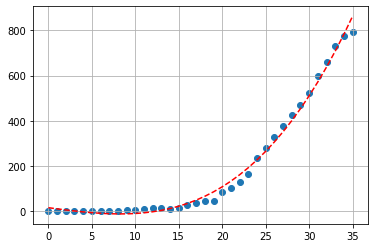

In [122]:
calculate_and_create_chart_for_province(START_DATE, 'Perugia')

## Terni

Total cases per 1000 inhabitants up to today: 0.9903
Total cases up to today: 226
New cases registered today: 8
New cases registered today in %: 3.67
Doubling time in the last five days: 10.6
Doubling time yesterday: 10.2
Trend of new cases (in %) in the last 5 days: 38.65


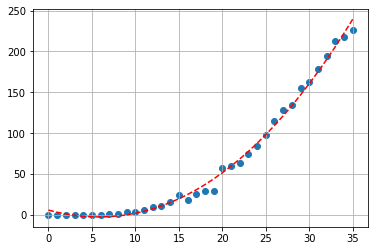

In [123]:
calculate_and_create_chart_for_province(START_DATE, 'Terni')

# Casi di COVID-19 in Valle d'Aosta - COVID-19 cases in Aosta Valley

Total cases per 1000 inhabitants up to today: 4.6027
Total cases up to today: 584
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 9.2
Doubling time yesterday: 9.2
Trend of new cases (in %) in the last 5 days: 45.64


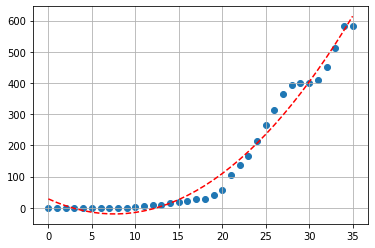

In [124]:
calculate_and_create_chart_for_province(START_DATE, "Aosta")

# Casi di COVID-19 in Veneto - COVID-19 cases in Veneto

Total cases up to today: 8448
New cases registered today: 354
New cases registered today in %: 4.37
Doubling time in the last five days: 11.2
Doubling time yesterday: 10.0
Trend of new cases (in %) in the last 5 days: 36.26


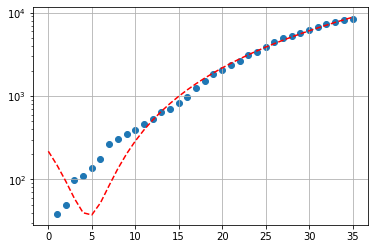

In [125]:
calculate_and_create_chart_for_region(START_DATE, 'Veneto')

## Belluno

Total cases per 1000 inhabitants up to today: 2.0556
Total cases up to today: 423
New cases registered today: 27
New cases registered today in %: 6.82
Doubling time in the last five days: 9.9
Doubling time yesterday: 9.3
Trend of new cases (in %) in the last 5 days: 41.95


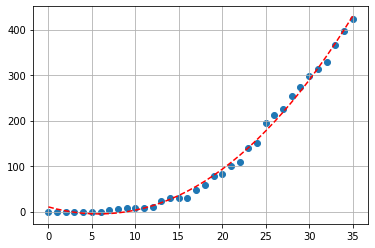

In [126]:
calculate_and_create_chart_for_province(START_DATE, 'Belluno')

## Padova

Total cases per 1000 inhabitants up to today: 2.3369
Total cases up to today: 2188
New cases registered today: 64
New cases registered today in %: 3.01
Doubling time in the last five days: 11.9
Doubling time yesterday: 9.3
Trend of new cases (in %) in the last 5 days: 33.74


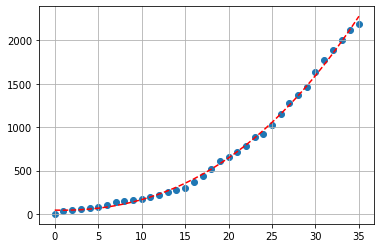

In [127]:
calculate_and_create_chart_for_province(START_DATE, 'Padova')

## Rovigo

Total cases per 1000 inhabitants up to today: 0.5491
Total cases up to today: 131
New cases registered today: 6
New cases registered today in %: 4.8
Doubling time in the last five days: 8.5
Doubling time yesterday: 8.2
Trend of new cases (in %) in the last 5 days: 50.57


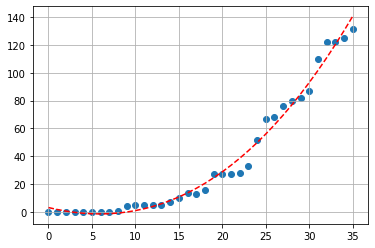

In [128]:
calculate_and_create_chart_for_province(START_DATE, 'Rovigo')

## Treviso

Total cases per 1000 inhabitants up to today: 1.6355
Total cases up to today: 1449
New cases registered today: 47
New cases registered today in %: 3.35
Doubling time in the last five days: 16.7
Doubling time yesterday: 13.8
Trend of new cases (in %) in the last 5 days: 23.11


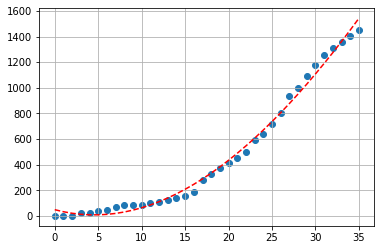

In [129]:
calculate_and_create_chart_for_province(START_DATE, 'Treviso')

## Venezia

Total cases per 1000 inhabitants up to today: 1.2958
Total cases up to today: 1107
New cases registered today: 40
New cases registered today in %: 3.75
Doubling time in the last five days: 14.7
Doubling time yesterday: 14.3
Trend of new cases (in %) in the last 5 days: 26.66


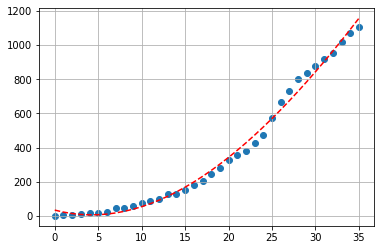

In [130]:
calculate_and_create_chart_for_province(START_DATE, 'Venezia')

## Verona

Total cases per 1000 inhabitants up to today: 2.1507
Total cases up to today: 1982
New cases registered today: 106
New cases registered today in %: 5.65
Doubling time in the last five days: 8.3
Doubling time yesterday: 8.2
Trend of new cases (in %) in the last 5 days: 51.99


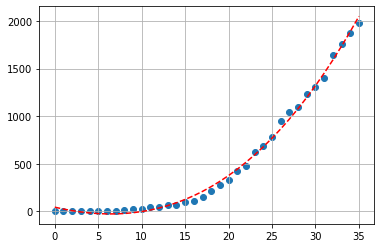

In [131]:
calculate_and_create_chart_for_province(START_DATE, 'Verona')

## Vicenza

Total cases per 1000 inhabitants up to today: 1.3502
Total cases up to today: 1168
New cases registered today: 64
New cases registered today in %: 5.8
Doubling time in the last five days: 9.9
Doubling time yesterday: 8.8
Trend of new cases (in %) in the last 5 days: 41.75


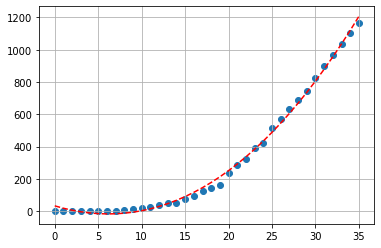

In [132]:
calculate_and_create_chart_for_province(START_DATE, 'Vicenza')